In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import cv2

In [2]:
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)
    
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()
        
    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()
    


In [3]:
%matplotlib inline

In [4]:
img = 'C:/Users/777/Downloads/colors.jpg'

In [5]:
clusters = 32
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()

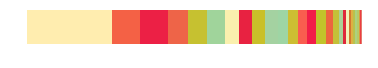

In [6]:
dc.plotHistogram()

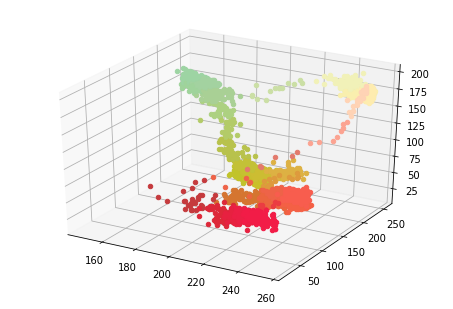

In [7]:
dc.plotClusters()

In [5]:
img = cv2.imread('C:/Users/777/Downloads/colors.jpg')

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
r, g, b = cv2.split(img)

In [8]:
r = r.flatten()

In [9]:
g = g.flatten()

In [10]:
b = b.flatten()

In [11]:
%matplotlib inline

In [12]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [13]:
ax = Axes3D(fig)

In [14]:
ax.scatter(r,g,b)

In [15]:
plt.show()

In [16]:
img

array([[[255, 239, 177],
        [255, 238, 176],
        [255, 237, 175],
        ...,
        [227, 172,  90],
        [226, 113,  55],
        [245,  91,  55]],

       [[255, 238, 176],
        [255, 237, 175],
        [255, 237, 175],
        ...,
        [202, 115,  46],
        [235, 103,  55],
        [255,  99,  67]],

       [[255, 238, 176],
        [255, 237, 175],
        [255, 237, 175],
        ...,
        [233, 101,  53],
        [255, 103,  66],
        [252,  91,  63]],

       ...,

       [[205, 194,  52],
        [202, 191,  47],
        [212, 185,  56],
        ...,
        [255, 237, 175],
        [255, 237, 175],
        [255, 237, 175]],

       [[194, 189,  46],
        [219, 181,  58],
        [214, 129,  39],
        ...,
        [255, 237, 175],
        [255, 237, 175],
        [255, 237, 175]],

       [[195, 192,  49],
        [204, 141,  36],
        [239, 105,  52],
        ...,
        [255, 237, 175],
        [255, 237, 175],
        [255, 237, 175]]

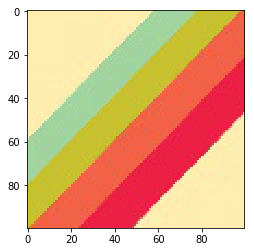

In [18]:
plt.imshow(img)

[[159 211 160]
 [246  95  74]
 [246 240 177]
 [197 193  42]
 [229  36  62]
 [221 174  66]
 [239  99  68]
 [254 236 175]
 [183 195  79]
 [176 207 121]
 [200 191  50]
 [214 118  49]
 [166 210 152]
 [200  55  61]
 [251 169 151]
 [237  31  69]]


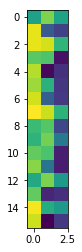